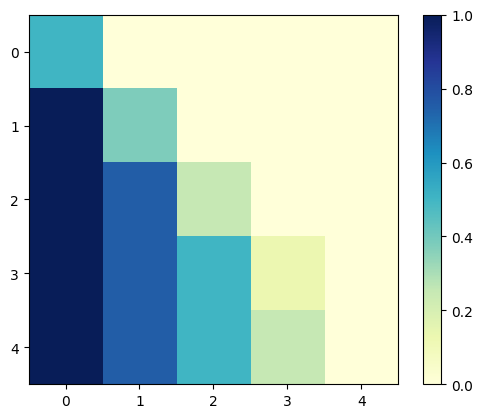

In [4]:
# initialize the reward matrix
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)
num_states = 5
num_actions = 5 # producing highest quantity
action2bid = np.linspace(0,1,num_actions)
reward = np.zeros((num_actions, num_actions))
for i in range(reward.shape[0]):
    for j in range(reward.shape[1]):
      if i>j: 
        reward[i, j] += 1-action2bid[j]
      elif i==j:
        reward[i, j] += (1-action2bid[i])/2
      else:
        reward[i, j] += 0

# Plot heatmap
plt.imshow(reward, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [7]:
import random
import numpy as np

# initialize parameters
gamma = 0.0
alpha = 0.1
initial_eps = 1.0
eps_decay = 0.999995
min_eps = 0.001
eps = initial_eps

# initialize the Q-table
Q1_period1 = np.ones((num_actions,num_actions))
Q1_period2 = np.ones((num_actions,num_actions,num_actions,num_actions))
Q2_period1 = np.ones((num_actions,num_actions))
Q2_period2 = np.ones((num_actions,num_actions,num_actions,num_actions))
agent1_period1_history = []
agent1_period2_history = []
agent2_period1_history = []
agent2_period2_history = []
winning_bid_history = []
agent1_total_reward = []
agent2_total_reward = []

In [8]:
# initialize the state
num_episodes = 2000000
winning_bid = 0
for episode in range(num_episodes):

    # ------ Period 1 ------
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent1_action1 = np.argmax(Q1_period1[winning_bid])
    else:
        agent1_action1 = np.random.choice(range(num_actions))
        
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent2_action1 = np.argmax(Q2_period1[winning_bid])
    else:
        agent2_action1 = np.random.choice(range(num_actions))
        
    # ------ Period 2 ------
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent1_action2 = np.argmax(Q1_period2[winning_bid,agent1_action1,agent2_action1])
    else:
        agent1_action2 = np.random.choice(range(num_actions))
      
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent2_action2 = np.argmax(Q2_period2[winning_bid,agent2_action1,agent1_action1])
    else:
        agent2_action2 = np.random.choice(range(num_actions))
         
    # collect rewards
    agent1_final_reward = reward[max(agent1_action1,agent1_action2), max(agent2_action1,agent2_action2)]
    agent2_final_reward = reward[max(agent2_action1,agent2_action2), max(agent1_action1,agent1_action2)]

     # ------ Update Step ------
   
    # agent 1 Q-values
    Q1_period1[winning_bid,agent1_action1] =  (1-alpha)*Q1_period1[winning_bid,agent1_action1] + alpha * (agent1_final_reward + gamma * np.max(Q1_period1[winning_bid]))
    Q1_period2[winning_bid,agent1_action1,agent2_action1,agent1_action2] =  (1-alpha)*Q1_period2[winning_bid,agent1_action1,agent2_action1,agent1_action2] + alpha * (agent1_final_reward + gamma * np.max(Q1_period2[winning_bid,agent1_action1,agent2_action1]))

    # agent 2 Q-values
    Q2_period1[winning_bid,agent2_action1] =  (1-alpha)*Q2_period1[winning_bid,agent2_action1] + alpha * (agent2_final_reward + gamma * np.max(Q2_period1[winning_bid]))
    Q2_period2[winning_bid,agent2_action1,agent1_action1,agent2_action2] =  (1-alpha)*Q2_period2[winning_bid,agent2_action1,agent1_action1,agent2_action2] + alpha * (agent2_final_reward + gamma * np.max(Q2_period2[winning_bid,agent2_action1,agent1_action1]))

    # update epsilon
    eps = max(min_eps, eps * eps_decay)

    # winning bid
    winning_bid = max(agent1_action1,agent1_action2,agent2_action1,agent2_action2)
    
    # print results
    if episode%100000==0:
      print('\n',episode, eps)

    # store history
    agent1_period1_history.append(agent1_action1)
    agent1_period2_history.append(agent1_action2)
    agent2_period1_history.append(agent2_action1)
    agent2_period2_history.append(agent2_action2)
    winning_bid_history.append(winning_bid)
    agent1_total_reward.append(agent1_final_reward)
    agent2_total_reward.append(agent2_final_reward)


 0 0.999995

 100000 0.6065268688957787

 200000 0.36787668207592394

 300000 0.22312820776031353

 400000 0.13533392988483717

 500000 0.08208407516878548

 600000 0.04978644603055721

 700000 0.030196968209202663

 800000 0.018315364154893966

 900000 0.011108816017633518

 1000000 0.006737829085459769

 1100000 0.004086694811832799

 1200000 0.0024787026018665247

 1300000 0.0015034072450701111

 1400000 0.001

 1500000 0.001

 1600000 0.001

 1700000 0.001

 1800000 0.001

 1900000 0.001


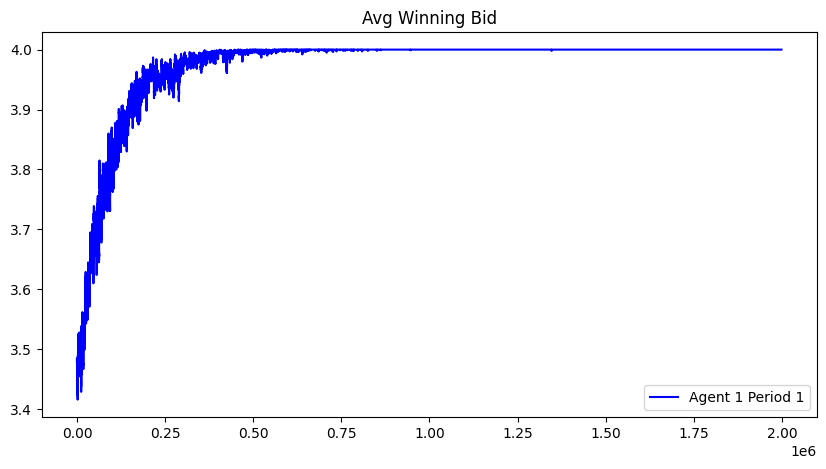

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['font.size']=10
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(np.array(winning_bid_history),1000), label = 'Agent 1 Period 1', c = 'b')
plt.title('Avg Winning Bid') 
plt.legend()
plt.show()